In [74]:
# Importing Required Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split

### 1. Data Collection

In [75]:
# Read the CSV as DataFrame
house_price_df = pd.read_csv('https://github.com/Namachivayam2001/Public_Datasets/raw/main/House_Price.csv')

In [76]:
house_price_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


### 2. Data Inspection

In [77]:
print(f'Number of rows in house_price_df: {house_price_df.shape[0]}')
print(f'Number of cols in house_price_df: {house_price_df.shape[1]}')

Number of rows in house_price_df: 4600
Number of cols in house_price_df: 18


In [78]:
house_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

### 3. Checking Null values

In [79]:
missing_details_df = pd.DataFrame({
    'Missing Count': house_price_df.isnull().sum(),
    'Missing Persentage': (house_price_df.isnull().sum() / len(house_price_df)) * 100
})
missing_details_df

,Missing Count,Missing Persentage
date,0,0.0
price,0,0.0
bedrooms,0,0.0
bathrooms,0,0.0
sqft_living,0,0.0
sqft_lot,0,0.0
floors,0,0.0
waterfront,0,0.0
view,0,0.0
condition,0,0.0


### 4. Checking Duplicates 

In [80]:
print(f'Number of Duplicates in house_price_df: {house_price_df.duplicated().sum()}')

Number of Duplicates in house_price_df: 0


### 5. Checking Outliers

In [81]:
# Fetch the numaric columns from the dataframe
num_cols = house_price_df.select_dtypes(include=['number']).columns.tolist()
print(f'Numerical columns from the dataframe: {num_cols}')

Numerical columns from the dataframe: ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']


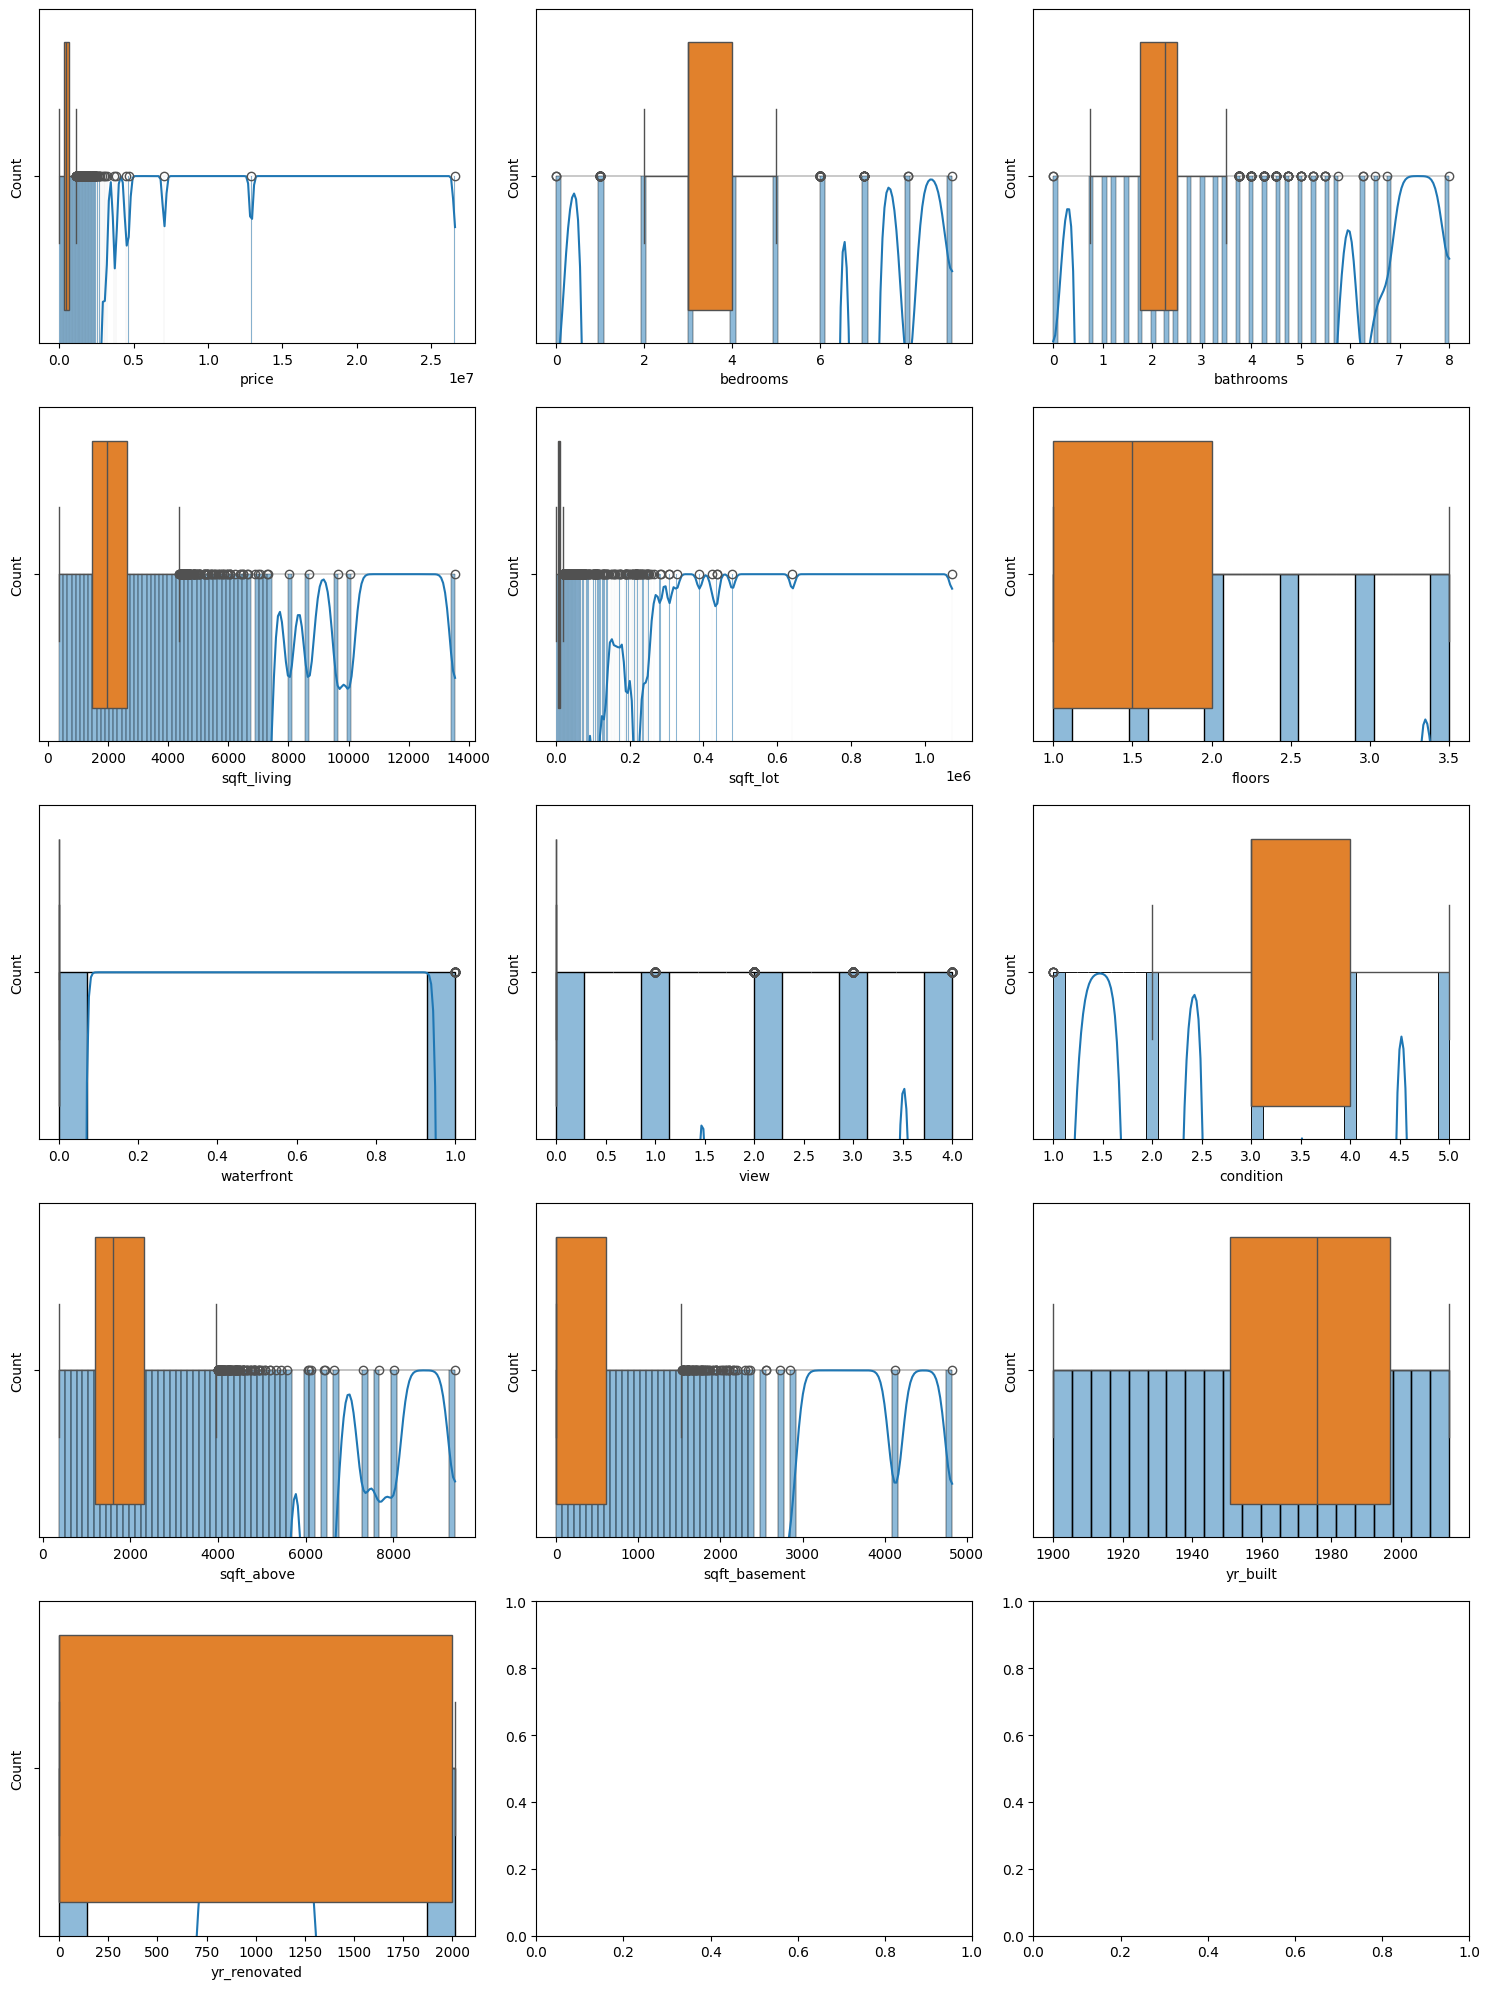

In [82]:
# Visualize the Distributionwith outliers
cols = 3
rows = (len(num_cols) + cols -1) // cols

fig, axis = plt.subplots(rows, cols, figsize=(5*cols, 4*rows))
axis = axis.flatten()

for i,col in enumerate(num_cols):
    sns.histplot(house_price_df[col], kde=True, ax=axis[i])
    sns.boxplot(x=house_price_df[col], ax=axis[i])

plt.tight_layout()
plt.show()

### 6. Feature Engineering

In [83]:
# create Address column by connecting street, city, statezip and country
house_price_df['Address'] = house_price_df['street'] + ',' + house_price_df['city'] + ',' + house_price_df['statezip'] + ',' + house_price_df['country']

In [84]:
house_price_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,Address
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,"18810 Densmore Ave N,Shoreline,WA 98133,USA"
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,"709 W Blaine St,Seattle,WA 98119,USA"
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,"26206-26214 143rd Ave SE,Kent,WA 98042,USA"
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,"857 170th Pl NE,Bellevue,WA 98008,USA"
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,"9105 170th Ave NE,Redmond,WA 98052,USA"


In [85]:
# Remove un-wanted columns
house_price_df.drop(['street', 'city', 'statezip', 'country', 'date'], axis=1, inplace=True)

In [86]:
# After Removing un-wanted columns
house_price_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,Address
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,"18810 Densmore Ave N,Shoreline,WA 98133,USA"
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,"709 W Blaine St,Seattle,WA 98119,USA"
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,"26206-26214 143rd Ave SE,Kent,WA 98042,USA"
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,"857 170th Pl NE,Bellevue,WA 98008,USA"
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,"9105 170th Ave NE,Redmond,WA 98052,USA"


### 7. Convert any DType to Numaric DType

In [87]:
encoder = LabelEncoder()

encoder.fit(house_price_df.Address.unique())
house_price_df.Address = encoder.transform(house_price_df.Address)

In [88]:
# Gather encoded Lbel and values from Address
address_label_value = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

In [89]:
# DataFrame after lable encoder
house_price_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,Address
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,1522
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,3899
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,2291
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,4263
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,4352


### 8. Checking Co-Relation

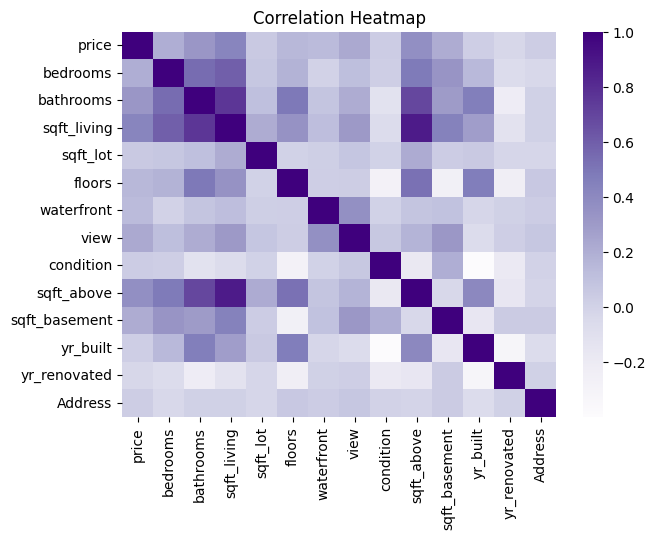

In [90]:
fig = plt.figure(figsize=(7, 5))
sns.heatmap(house_price_df.corr(), cmap='Purples', annot=False, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

### 9. Split single Table into train and test Data

In [91]:
# Spliting the Table as Feature and Outcome
feature = house_price_df.iloc[:, 1:]
outcome = house_price_df.iloc[:, :1]

In [92]:
x_train, x_test, y_train, y_test = train_test_split(feature, outcome, test_size=0.2, random_state=42)

### 10. Standerdize the features

In [93]:
# Standardize
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

### 11. Create the Model

In [94]:
regression_model = LinearRegression()

### 12. Train the model

In [95]:
regression_model.fit(x_train_scaled, y_train)

LinearRegression()